<a href="https://colab.research.google.com/github/derektypist/data-grapher/blob/main/Data_Graph_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [62]:
# Apply Imports
import pandas as pd
from google.colab import files
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

# Get CSV File Data

In [65]:
def get_csv_file_data():
  choice = input("""
  Please choose an option below to get a CSV File:\n
  ------------------------------------------------\n
  1. Upload file
  2. Provide URL
  3. Use test data
  ------------------------------------------------\n
  """
  )

  if choice == "1":
    uploaded_file = files.upload()
    file_name = list(uploaded_file.keys())[0]
    return pd.read_csv(StringIO(uploaded_file[file_name].decode("utf-8")))
  elif choice == "2":
    url = input("Enter the URL: ")
    response = requests.get(url)
    return pd.read_csv(StringIO(response.text))
  elif choice == "3":
    url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
    response = requests.get(url)
    return pd.read_csv(StringIO(response.text))
  else:
    print("Invalid option")
    return None


# Print Some Examples from the Data

In [66]:
def show_data(data, headings):
  print("Headings {0}".format(headings))
  print(data.head(2))

# Display

Run to use Data Grapher


  Please choose an option below to get a CSV File:

  ------------------------------------------------

  1. Upload file
  2. Provide URL
  3. Use test data
  ------------------------------------------------

  2
Enter the URL: https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/women.csv
Headings ['Unnamed: 0', 'year', 'date', 'all_2534', 'HS_2534', 'SC_2534', 'BAp_2534', 'BAo_2534', 'GD_2534', 'White_2534', 'Black_2534', 'Hisp_2534', 'NE_2534', 'MA_2534', 'Midwest_2534', 'South_2534', 'Mountain_2534', 'Pacific_2534', 'poor_2534', 'mid_2534', 'rich_2534', 'all_3544', 'HS_3544', 'SC_3544', 'BAp_3544', 'BAo_3544', 'GD_3544', 'White_3544', 'Black_3544', 'Hisp_3544', 'NE_3544', 'MA_3544', 'Midwest_3544', 'South_3544', 'Mountain_3544', 'Pacific_3544', 'poor_3544', 'mid_3544', 'rich_3544', 'all_4554', 'HS_4554', 'SC_4554', 'BAp_4554', 'BAo_4554', 'GD_4554', 'White_4554', 'Black_4554', 'Hisp_4554', 'NE_4554', 'MA_4554', 'Midwest_4554', 'South_4554', 'Mountain_4554', 'Paci

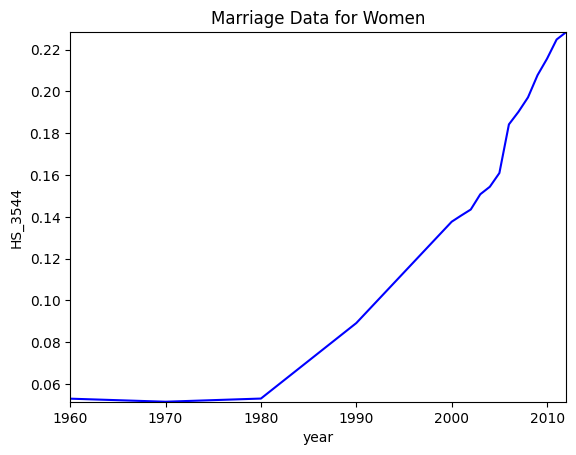

In [79]:
df = get_csv_file_data()
headings = df.columns.to_list()
show_data(df, headings)

# Display Column Names
print("\nColumns: ")
for heading in headings:
  print("\t {0}".format(heading))

# Apply User Input to Customize Graph
title = input("\nEnter title of graph: ")
xcol = input("\nEnter name of column to be on the X-Axis: ")
ycol = input("\nEnter name of column to be on the Y-Axis: ")

if xcol not in headings:
  print("ERROR! Column name not found")
  xcol = input("\nEnter name of column to be on the X-Axis.  Use correct spelling and capitalization.")

if ycol not in headings:
  print("ERROR! Column name not found")
  ycol = input("\nEnter name of column to be on the Y-Axis.  Use correct spelling and capitaliztion.")

scatter_or_line = input("""
Please choose an option to below to get type of graph:\n
------------------------------------------------------\n
1. Scatter Plot
2. Line Graph
------------------------------------------------------\n
""")

if scatter_or_line not in ["1","2"]:
  print("Input not valid.  Defaulting to line graph")
  scatter_or_line = "2"

print("\n")
# Create the graph
x = df[xcol].to_numpy()
y = df[ycol].to_numpy()

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])

if scatter_or_line == "1":
  # Create scatter plot
  plt.plot(x,y,'ro')
else:
  # Create line chart
  plt.plot(x,y,'b')

ax.set_title(title)
ax.set_ylabel(ycol)
ax.set_xlabel(xcol)
plt.show()